In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [ ]:
df = pd.read_csv('diabetes_data_upload.csv')

In [ ]:
df.head(5)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

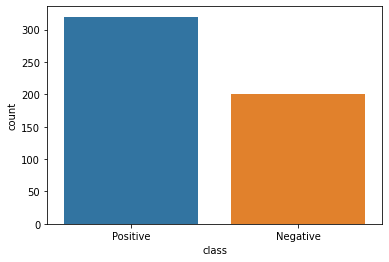

In [ ]:
import seaborn as sns

sns.countplot(df['class'],data=df)

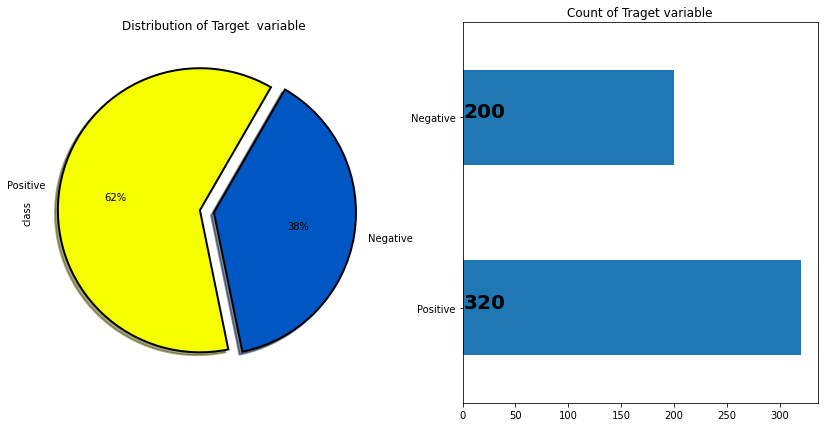

In [ ]:
# plotting to create pie chart and bar plot as subplots
plt.figure(figsize=(14,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Positive","Negative"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")

for i,j in enumerate(df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Traget variable")
plt.show()

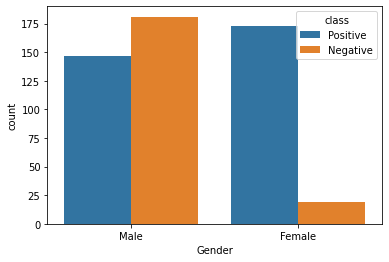

In [ ]:
import seaborn as sns

sns.countplot(df['Gender'],hue=df['class'], data=df)

In [ ]:
 plot_criteria= ['Gender', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


In [ ]:
 plot_criteria= ['Polyuria', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


### Distribution of Polydipsia

In [ ]:
plot_criteria= ['Polydipsia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polydipsia,,
No,96.000000,29.690000
Yes,4.000000,70.310000


### Distribution of sudden weight loss

In [ ]:
plot_criteria= ['sudden weight loss', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


### Distribution of weakness

In [ ]:
plot_criteria= ['weakness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
weakness,,
No,56.500000,31.870000
Yes,43.500000,68.120000


In [ ]:
plot_criteria= ['Polyphagia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polyphagia,,
No,76.000000,40.940000
Yes,24.000000,59.060000


### Itching

In [ ]:
plot_criteria= ['Itching', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Itching,,
No,50.500000,51.880000
Yes,49.500000,48.120000


### Irritability

In [ ]:
plot_criteria= ['Irritability', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Irritability,,
No,92.000000,65.620000
Yes,8.000000,34.380000


### Delayed Healing

In [ ]:
plot_criteria= ['delayed healing', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
delayed healing,,
No,57.000000,52.190000
Yes,43.000000,47.810000


### Partial Paresis

In [ ]:
plot_criteria= ['partial paresis', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
partial paresis,,
No,84.000000,40.000000
Yes,16.000000,60.000000


### Muscle Stiffness

In [ ]:
plot_criteria= ['muscle stiffness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
muscle stiffness,,
No,70.000000,57.810000
Yes,30.000000,42.190000


### Alopecia

In [ ]:
plot_criteria= ['Alopecia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Alopecia,,
No,49.500000,75.620000
Yes,50.500000,24.380000


### Obesity

In [ ]:
plot_criteria= ['Obesity', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Obesity,,
No,86.500000,80.940000
Yes,13.500000,19.060000


### Data pre-processing

In [ ]:
df['class'] = df['class'].apply(lambda x: 0 if x=='Negative' else 1)

In [ ]:
X= df.drop(['class'],axis=1)
y=df['class']

In [ ]:
objList = X.select_dtypes(include = "object").columns
print (objList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [ ]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    X[feat] = le.fit_transform(X[feat].astype(str))

print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
dtypes: int64(16)
memory usage: 65.1 KB
None


In [ ]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


### Correlation

In [ ]:
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

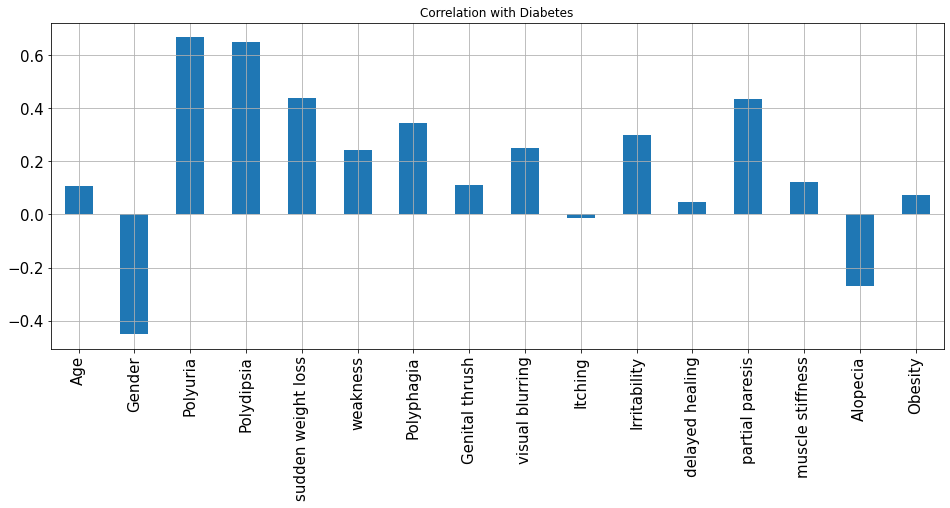

In [ ]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 6), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)


### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 1234)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 1234)

In [ ]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    256
0    160
Name: class, dtype: int64
Distribution of traget variable in test set
1    64
0    40
Name: class, dtype: int64


### Data Normalization 

In [ ]:
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

In [ ]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
246,0.405405,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
274,0.554054,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
424,0.364865,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0
316,0.527027,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
159,0.297297,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0


### Model Building

### 1. Logistic Regression (Base model)

In [ ]:
logi = LogisticRegression(random_state = 0, penalty = 'l2')
logi.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=0)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = logi, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_logi.mean()

0.9064459930313589

In [ ]:
y_predict_logi = logi.predict(X_test)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.971154,0.906446,0.984127,0.96875,0.976378,0.971875


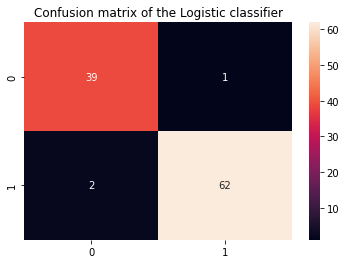

In [ ]:
cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

In [ ]:
TP = cm_logi[1,1] # true positive 
TN = cm_logi[0,0] # true negatives
FP = cm_logi[0,1] # false positives
FN = cm_logi[1,0] # false negatives
# Let us calculate specificity
TN / float(TN+FP)

0.975

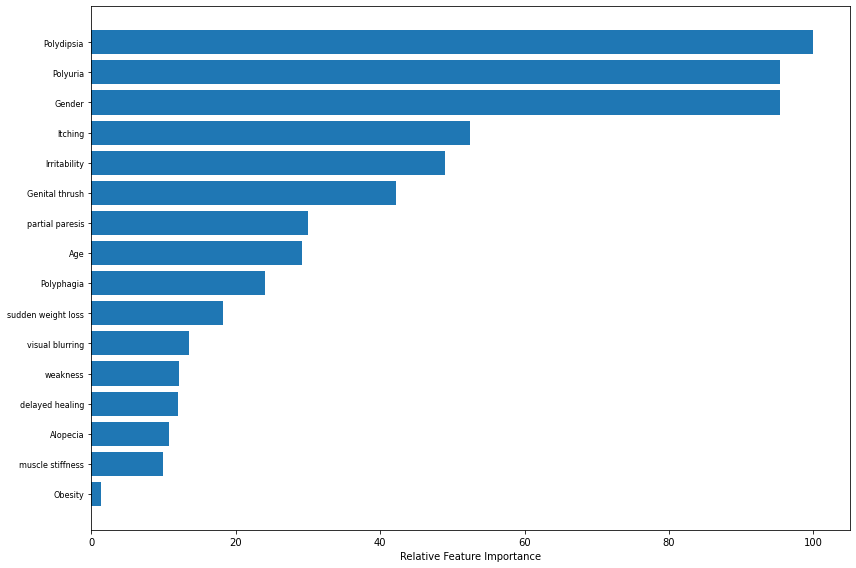

In [ ]:
feature_importance = abs(logi.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .3

featfig = plt.figure(figsize=(12,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

## 2. Random forest (Before Tuning)

In [ ]:
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=7)
scoring = 'accuracy'

acc_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_rf.mean()

0.966260162601626

In [ ]:
y_predict_r = rf.predict(X_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest (Untuned)',acc, acc_rf.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.971154,0.906446,0.984127,0.968750,0.976378,0.971875
1,Random Forest (Untuned),0.990385,0.966260,1.000000,0.984375,0.992126,0.992188


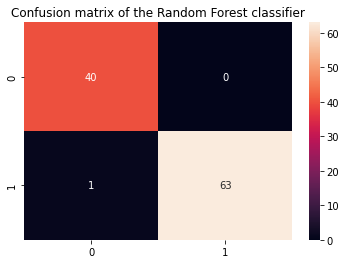

In [ ]:
cm_rf = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm_rf,annot=True,fmt="d")
plt.show()

In [ ]:
TP = cm_rf[1,1] # true positive 
TN = cm_rf[0,0] # true negatives
FP = cm_rf[0,1] # false positives
FN = cm_rf[1,0] # false negatives
# Let us calculate specificity
TN / float(TN+FP)

1.0

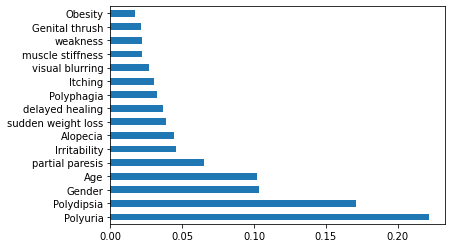

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

### Feature Selection - Top 10 Features

In [ ]:
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [ ]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


#### filtering unwanted features

In [ ]:
X_fs = X[['Polyuria', 'Polydipsia','Age', 'Gender','partial paresis','sudden weight loss','Irritability', 'delayed healing','Alopecia','Itching']]

### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size = 0.2,stratify=y, random_state = 1234)

### Data normalization

In [ ]:
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

### Model building

#### Logistic Regression - Post Feature Selection

In [ ]:
logi = LogisticRegression(random_state = 0, penalty = 'l2')
logi.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Cross validation

In [ ]:
kfold = model_selection.KFold(n_splits=10, shuffle=True,random_state=7)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = logi, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_logi.mean()

0.9085365853658539

In [ ]:
y_predict_logi = logi.predict(X_test)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

model_results = pd.DataFrame([['Logistic Regression-Post FS',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.971154,0.906446,0.984127,0.968750,0.976378,0.971875
1,Random Forest (Untuned),0.990385,0.966260,1.000000,0.984375,0.992126,0.992188
2,Logistic Regression-Post FS,0.961538,0.908537,0.983871,0.953125,0.968254,0.964063


### Random Forest - Post Feature selection

In [ ]:
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

### Cross Va;idation

In [ ]:
kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=7)
scoring = 'accuracy'

acc_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_rf.mean()

0.9613821138211384

### Model Evaluation

In [ ]:
y_predict_r = rf.predict(X_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest- Post FS',acc, acc_rf.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.971154,0.906446,0.984127,0.968750,0.976378,0.971875
1,Random Forest (Untuned),0.990385,0.966260,1.000000,0.984375,0.992126,0.992188
2,Logistic Regression-Post FS,0.961538,0.908537,0.983871,0.953125,0.968254,0.964063
3,Random Forest- Post FS,0.990385,0.961382,1.000000,0.984375,0.992126,0.992188


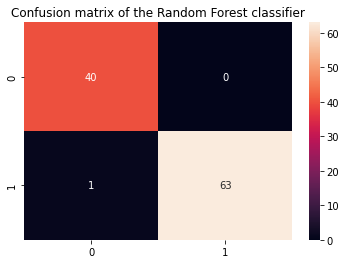

In [ ]:
cm_rf = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm_rf,annot=True,fmt="d")
plt.show()

In [ ]:
TP = cm_rf[1,1] # true positive 
TN = cm_rf[0,0] # true negatives
FP = cm_rf[0,1] # false positives
FN = cm_rf[1,0] # false negatives
# Let us calculate specificity
TN / float(TN+FP)

1.0

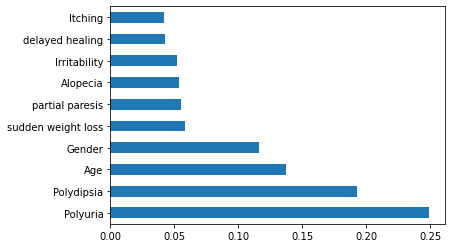

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

### Plotting ROC 

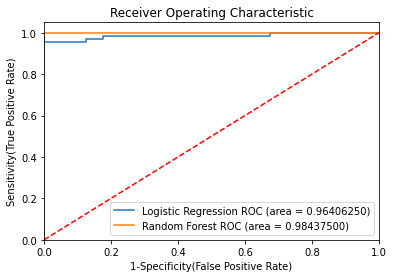

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(random_state = 0, penalty = 'l2'),
},

    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators = 100,criterion='gini', random_state = 47),
},
    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.8f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()